# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


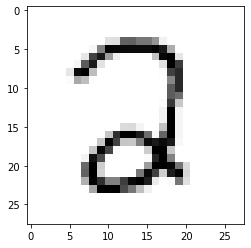

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2467866264171911
train accuracy is: 0.5903021198464363, test accuracy is 0.6018145161290323


Epoch 10 Loss 0.17268028932766274
train accuracy is: 0.8897512936070773, test accuracy is 0.9042338709677419


Epoch 20 Loss 0.08239338887673939
train accuracy is: 0.9222166583208146, test accuracy is 0.9390120967741935


Epoch 30 Loss 0.05419492908814191
train accuracy is: 0.9419963278250709, test accuracy is 0.9571572580645161


Epoch 40 Loss 0.04332306524192448
train accuracy is: 0.9520948088799867, test accuracy is 0.9642137096774194


Epoch 50 Loss 0.037794427181938935
train accuracy is: 0.957102320146887, test accuracy is 0.9667338709677419


Epoch 60 Loss 0.03441725468096087
train accuracy is: 0.9604406609914873, test accuracy is 0.9702620967741935


Epoch 70 Loss 0.03209025970189859
train accuracy is: 0.9633617092305125, test accuracy is 0.9707661290322581


Epoch 80 Loss 0.030369786913573154
train accuracy is: 0.9651977966950426, test accuracy is 0.9717741935483871


Epoch 90 Loss 0.029014766342942623
train accuracy is: 0.9667835085962276, test accuracy is 0.9722782258064516


Epoch 100 Loss 0.027912017218991024
train accuracy is: 0.9676180938073777, test accuracy is 0.9717741935483871


Epoch 110 Loss 0.02698390949363289
train accuracy is: 0.9688699716241028, test accuracy is 0.9717741935483871


Epoch 120 Loss 0.026180331430463458
train accuracy is: 0.9698714738774828, test accuracy is 0.9707661290322581


Epoch 130 Loss 0.025462587599037245
train accuracy is: 0.970956434651978, test accuracy is 0.9712701612903226


Epoch 140 Loss 0.024820797568656804
train accuracy is: 0.971707561342013, test accuracy is 0.9717741935483871


Epoch 150 Loss 0.02423142402440807
train accuracy is: 0.972458688032048, test accuracy is 0.9712701612903226


Epoch 160 Loss 0.023698574341075564
train accuracy is: 0.972458688032048, test accuracy is 0.9717741935483871


Epoch 170 Loss 0.02319841313669878
train accuracy is: 0.9729594391587381, test accuracy is 0.9712701612903226


Epoch 180 Loss 0.022737353050942506
train accuracy is: 0.9734601902854282, test accuracy is 0.9712701612903226


Epoch 190 Loss 0.022293911663463076
train accuracy is: 0.9737940243698882, test accuracy is 0.9712701612903226


Epoch 200 Loss 0.021878537049494842
train accuracy is: 0.9748789851443832, test accuracy is 0.9712701612903226


Epoch 210 Loss 0.021485434733120867
train accuracy is: 0.9747955266232682, test accuracy is 0.9717741935483871


Epoch 220 Loss 0.02111174920332861
train accuracy is: 0.9757135703555333, test accuracy is 0.9727822580645161


Epoch 230 Loss 0.020760554272191166
train accuracy is: 0.9763812385244534, test accuracy is 0.9727822580645161


Epoch 240 Loss 0.020418273726746275
train accuracy is: 0.9767985311300283, test accuracy is 0.9727822580645161


0.04023349319956077

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.26592408396903544
train accuracy is: 0.5777833416791854, test accuracy is 0.5498991935483871


Epoch 10 Loss 0.10554775557490731
train accuracy is: 0.9072775830412285, test accuracy is 0.9122983870967742


Epoch 20 Loss 0.0802866080789532
train accuracy is: 0.9264730428976798, test accuracy is 0.9380040322580645


Epoch 30 Loss 0.06903102708771058
train accuracy is: 0.9341512268402604, test accuracy is 0.9470766129032258


Epoch 40 Loss 0.06233261825354174
train accuracy is: 0.9389083625438157, test accuracy is 0.9501008064516129


Epoch 50 Loss 0.05777927066811341
train accuracy is: 0.9424970789517609, test accuracy is 0.9536290322580645


Epoch 60 Loss 0.05443548291268427
train accuracy is: 0.9455015857119012, test accuracy is 0.9581653225806451


Epoch 70 Loss 0.05184966298402996
train accuracy is: 0.9482557169086964, test accuracy is 0.9581653225806451


Epoch 80 Loss 0.04977570720202198
train accuracy is: 0.9495910532465365, test accuracy is 0.9596774193548387


Epoch 90 Loss 0.04806174840283725
train accuracy is: 0.9509263895843766, test accuracy is 0.9606854838709677


Epoch 100 Loss 0.046617727781675486
train accuracy is: 0.9522617259222167, test accuracy is 0.9611895161290323


Epoch 110 Loss 0.045377868232935506
train accuracy is: 0.9531797696544817, test accuracy is 0.9621975806451613


Epoch 120 Loss 0.04429815608884938
train accuracy is: 0.9540978133867468, test accuracy is 0.9621975806451613


Epoch 130 Loss 0.04334648478086902
train accuracy is: 0.9549323985978968, test accuracy is 0.9627016129032258


Epoch 140 Loss 0.04249947942556386
train accuracy is: 0.9557669838090469, test accuracy is 0.9632056451612904


Epoch 150 Loss 0.04173923886837083
train accuracy is: 0.956685027541312, test accuracy is 0.9642137096774194


Epoch 160 Loss 0.04105165739635252
train accuracy is: 0.957519612752462, test accuracy is 0.9652217741935484


Epoch 170 Loss 0.04042554091811234
train accuracy is: 0.9581872809213821, test accuracy is 0.9652217741935484


Epoch 180 Loss 0.03985244707451197
train accuracy is: 0.9586880320480721, test accuracy is 0.9657258064516129


Epoch 190 Loss 0.03932560683023819
train accuracy is: 0.9591053246536472, test accuracy is 0.9657258064516129


Epoch 200 Loss 0.03883767245373803
train accuracy is: 0.9591887831747622, test accuracy is 0.9662298387096774


Epoch 210 Loss 0.03838548850251536
train accuracy is: 0.9596060757803372, test accuracy is 0.9667338709677419


Epoch 220 Loss 0.037964411669952985
train accuracy is: 0.9598564513436821, test accuracy is 0.9672379032258065


Epoch 230 Loss 0.037570231074662
train accuracy is: 0.9601068269070272, test accuracy is 0.9672379032258065


Epoch 240 Loss 0.03720109043997655
train accuracy is: 0.9607744950759473, test accuracy is 0.9672379032258065


0.03972842189656618

### Comparing results of NN and LR

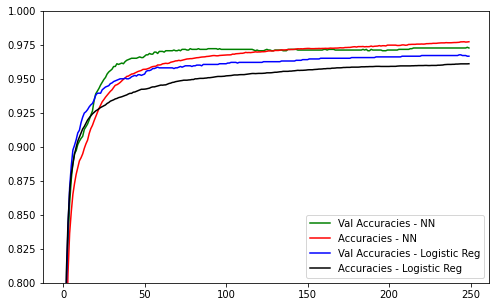

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

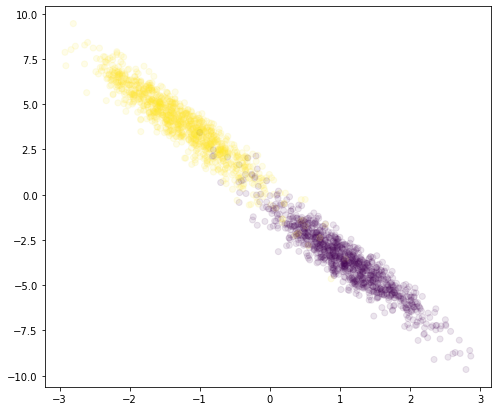

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

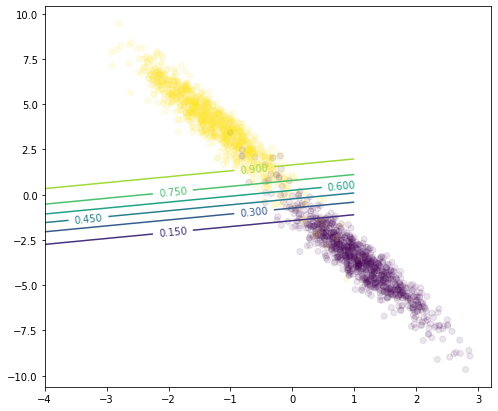

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );